In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
columns = pd.read_csv("/content/drive/MyDrive/Walmart_MLE/census-income.columns")
column_names = columns.values.tolist()

In [25]:
column_name_list = [item for sublist in column_names for item in sublist]
column_name_list

['class of worker',
 'detailed industry recode',
 'detailed occupation recode',
 'education',
 'wage per hour',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'instance weight',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'num persons worked for employer',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 'own business or self employed',
 "fill inc questionnaire for veteran's admin

In [26]:
data = pd.read_csv("/content/drive/MyDrive/Walmart_MLE/census-income.data", names=column_name_list)

In [27]:
pd.set_option('display.max_columns', None)
data.head()

,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
detailed industry recode,199523.0,15.352320,18.067129,0.00,0.000,0.00,33.00,51.0
detailed occupation recode,199523.0,11.306556,14.454204,0.00,0.000,0.00,26.00,46.0
wage per hour,199523.0,55.426908,274.896454,0.00,0.000,0.00,0.00,9999.0
capital gains,199523.0,434.718990,4697.531280,0.00,0.000,0.00,0.00,99999.0
capital losses,199523.0,37.313788,271.896428,0.00,0.000,0.00,0.00,4608.0
dividends from stocks,199523.0,197.529533,1984.163658,0.00,0.000,0.00,0.00,99999.0
instance weight,199523.0,1740.380269,993.768156,37.87,1061.615,1618.31,2188.61,18656.3
num persons worked for employer,199523.0,1.956180,2.365126,0.00,0.000,1.00,4.00,6.0
own business or self employed,199523.0,0.175438,0.553694,0.00,0.000,0.00,0.00,2.0
veterans benefits,199523.0,1.514833,0.851473,0.00,2.000,2.00,2.00,2.0


#Data Cleaning

In [29]:
data[data== '?'] = np.nan
data_new = data.dropna(axis=0)

In [30]:
data_new = data_new.drop(['major industry code','major occupation code'], axis=1)

In [31]:
data_new['label'].replace({'- 50000.':0, '50000+.':1}, inplace=True)
data_new.head()

,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
9,Not in universe,0,0,Children,0,Not in universe,Never married,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
10,Not in universe,0,0,Children,0,Not in universe,Never married,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1535.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1146.79,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0


In [32]:
data_new.describe()

,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,label
count,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.0,94462.000000
mean,15.307415,11.432248,55.622345,394.308230,37.130063,187.649637,1725.767126,1.918793,0.172387,1.505145,23.126887,94.0,0.057610
std,18.018897,14.530230,278.451640,4393.745074,269.998980,1929.434110,972.064671,2.332962,0.550273,0.857347,24.396105,0.0,0.233007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.290000,0.000000,0.000000,0.000000,0.000000,94.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1065.740000,0.000000,0.000000,1.000000,0.000000,94.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1623.265000,1.000000,0.000000,2.000000,8.000000,94.0,0.000000
75%,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2157.107500,4.000000,0.000000,2.000000,52.000000,94.0,0.000000
max,51.000000,46.000000,9999.000000,99999.000000,4356.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,94.0,1.000000


In [33]:
a=['dividends from stocks', 'capital gains', 'capital losses','weeks worked in year','instance weight']
for i in a:
    #print(a)
    print(i,':',stats.pointbiserialr(data_new['label'],data_new[i])[0])

dividends from stocks : 0.18155167630600946
capital gains : 0.24134964085395322
capital losses : 0.1538703166197669
weeks worked in year : 0.25297729916669415
instance weight : 0.016594265921154226


#Feature Engineering

In [16]:
data_weighted = data_new.copy(deep=True)
# data_new = data_new.drop('instance weight', axis=1)

In [34]:

def cross_tab(obs1=[]):
    observed=pd.crosstab(obs1,data_new['label'])
    val=stats.chi2_contingency(observed)
    return(val[1])

category=data_new.columns[data_new.dtypes!=object].tolist()
category

['detailed industry recode',
 'detailed occupation recode',
 'wage per hour',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'instance weight',
 'num persons worked for employer',
 'own business or self employed',
 'veterans benefits',
 'weeks worked in year',
 'year',
 'label']

In [35]:

alpha=0.01
count=0
features=[]
for i in category:
    p_value=cross_tab(data_new[i])
    if p_value<=alpha:
        count+=1
        features.append(i)

In [19]:
features

['detailed industry recode',
 'detailed occupation recode',
 'wage per hour',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'num persons worked for employer',
 'own business or self employed',
 'veterans benefits',
 'weeks worked in year',
 'label']

#Feature Scaling

In [36]:
categorical_cols = data_new.columns[data_new.dtypes==object].tolist()
data_census=pd.get_dummies(data_new,columns=categorical_cols)

columns_to_scale = ['wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'weeks worked in year']
mms = MinMaxScaler()
min_max_scaled_columns = mms.fit_transform(data_census[columns_to_scale])

data_census['wage per hour'] = min_max_scaled_columns[:,0]
data_census['capital gains'] = min_max_scaled_columns[:,1]
data_census['capital losses'] = min_max_scaled_columns[:,2]
data_census['dividends from stocks'] = min_max_scaled_columns[:,3]
data_census['weeks worked in year']=min_max_scaled_columns[:,4]
data_census.head()

,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,label,class of worker_Federal government,class of worker_Local government,class of worker_Never worked,class of worker_Not in universe,class of worker_Private,class of worker_Self-employed-incorporated,class of worker_Self-employed-not incorporated,class of worker_State government,class of worker_Without pay,education_10th grade,education_11th grade,education_12th grade no diploma,education_1st 2nd 3rd or 4th grade,education_5th or 6th grade,education_7th and 8th grade,education_9th grade,education_Associates degree-academic program,education_Associates degree-occup /vocational,education_Bachelors degree(BA AB BS),education_Children,education_Doctorate degree(PhD EdD),education_High school graduate,education_Less than 1st grade,education_Masters degree(MA MS MEng MEd MSW MBA),education_Prof school degree (MD DDS DVM LLB JD),education_Some college but no degree,enroll in edu inst last wk_College or university,enroll in edu inst last wk_High school,enroll in edu inst last wk_Not in universe,marital stat_Divorced,marital stat_Married-A F spouse present,marital stat_Married-civilian spouse present,marital stat_Married-spouse absent,marital stat_Never married,marital stat_Separated,marital stat_Widowed,race_Amer Indian Aleut or Eskimo,race_Asian or Pacific Islander,race_Black,race_Other,race_White,hispanic origin_All other,hispanic origin_Central or South American,hispanic origin_Chicano,hispanic origin_Cuban,hispanic origin_Do not know,hispanic origin_Mexican (Mexicano),hispanic origin_Mexican-American,hispanic origin_Other Spanish,hispanic origin_Puerto Rican,sex_Female,sex_Male,member of a labor union_No,member of a labor union_Not in universe,member of a labor union_Yes,reason for unemployment_Job leaver,reason for unemployment_Job loser - on layoff,reason for unemployment_New entrant,reason for unemployment_Not in universe,reason for unemployment_Other job loser,reason for unemployment_Re-entrant,full or part time employment stat_Children or Armed Forces,tax filer stat_Head of household,tax filer stat_Joint both 65+,tax filer stat_Joint both under 65,tax filer stat_Joint one under 65 & one 65+,tax filer stat_Nonfiler,tax filer stat_Single,region of previous residence_Abroad,region of previous residence_Midwest,region of previous residence_Northeast,region of previous residence_Not in universe,region of previous residence_South,region of previous residence_West,state of previous residence_Abroad,state of previous residence_Alabama,state of previous residence_Alaska,state of previous residence_Arizona,state of previous residence_Arkansas,state of previous residence_California,state of previous residence_Colorado,state of previous residence_Connecticut,state of previous residence_Delaware,state of previous residence_District of Columbia,state of previous residence_Florida,state of previous residence_Georgia,state of previous residence_Idaho,state of previous residence_Illinois,state of previous residence_Indiana,state of previous residence_Iowa,state of previous residence_Kansas,state of previous residence_Kentucky,state of previous residence_Louisiana,state of previous residence_Maine,state of previous residence_Maryland,state of previous residence_Massachusetts,state of previous residence_Michigan,state of previous residence_Minnesota,state of previous residence_Mississippi,state of previous residence_Missouri,state of previous residence_Montana,state of previous residence_Nebraska,state of previous residence_Nevada,state of previous residence_New Hampshire,state of previous residence_New Jersey,state of previous residence_New Mexico,state of previous residence_New York,state of previous residence_North Carolina,state of previous residence_North Dakota,state of previous residence_Not in unive

#Dataset Exploration 

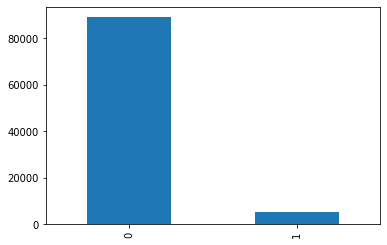

In [37]:
data_census['label'].value_counts().plot(kind='bar')

In [38]:
data_census.columns

Index(['detailed industry recode', 'detailed occupation recode',
       'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'instance weight',
       'num persons worked for employer', 'own business or self employed',
       'veterans benefits',
       ...
       'country of birth self_Vietnam', 'country of birth self_Yugoslavia',
       'citizenship_Foreign born- Not a citizen of U S ',
       'citizenship_Foreign born- U S citizen by naturalization',
       'citizenship_Native- Born abroad of American Parent(s)',
       'citizenship_Native- Born in Puerto Rico or U S Outlying',
       'citizenship_Native- Born in the United States',
       'fill inc questionnaire for veteran's admin_No',
       'fill inc questionnaire for veteran's admin_Not in universe',
       'fill inc questionnaire for veteran's admin_Yes'],
      dtype='object', length=347)

***Class Weights Estimation***

In [53]:
ins_w0 = data_census.loc[data_census['label']==0]['instance weight'].sum()
ins_w0

153272752.28000003

In [57]:
ins_w = data_census['instance weight'].sum()
ins_w

163019414.27

In [60]:
# wj=n_samples / (n_classes * n_samplesj)

# w_0 = (data_census.loc[])
w_0 = (data_census.shape[0]*ins_w)/(data_census[data_census['label']==0].shape[0] * ins_w0)
w_0

1.1286100647109831

In [54]:
ins_w1= data_census.loc[data_census['label']==1]['instance weight'].sum()
ins_w1

9746661.99

In [61]:
w_1 = (data_census.shape[0]*ins_w)/(data_census[data_census['label']==1].shape[0] * ins_w1)
w_1

290.32338725147474

In [69]:
weights= {0: w_0, 1: w_1}

#Train and test data creation for imbalanced Dataset 

In [63]:
x = data_census.drop('label', axis=1)
y = data_census['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train, Y_train = SMOTE().fit_resample(x_train, y_train)



#***Logistic Regression***

In [70]:
lr = LogisticRegression(solver='newton-cg', class_weight=weights, max_iter=100)
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(class_weight={0: 1.1286100647109831, 1: 290.32338725147474},
                   solver='newton-cg')

#***Naive Bayes***

In [71]:
model = GaussianNB()
gnb = model.fit(X_train,Y_train)
predictions_NB = gnb.predict(x_test)

#***DecisionTree Classifier***

In [79]:
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)
# Train Decision Tree Classifer
clf.fit(X_train,Y_train)
predictions_DT = clf.predict(x_test)

#***DecisionTree Classifier with Class weights***

In [80]:
clfw = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10,class_weight=weights)
# Train Decision Tree Classifer
clfw.fit(x_train,y_train)
predictions_DTW = clfw.predict(x_test)

#***Random Forest***

In [81]:
rf=RandomForestClassifier(min_samples_split=30)
rf.fit(X_train,Y_train)
predictions_RF=rf.predict(x_test)

#***Random Forest Classifier with Class weights***

In [82]:
rfw=RandomForestClassifier(min_samples_split=30, class_weight=weights)
rfw.fit(x_train,y_train)
predictions_RFW=rfw.predict(x_test)

#Model Analysis

Random Prediction: ROC AUC=0.500
Naive Bayes: ROC AUC=0.762
Random Forest: ROC AUC=0.933
Random Forest with manual weights: ROC AUC=0.925
Decision Tree Classifer: ROC AUC=0.894
Decision Tree Classifer with manual weights: ROC AUC=0.905


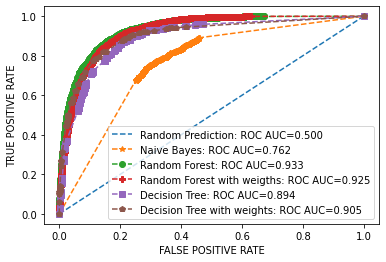

In [84]:
nb_probs = gnb.predict_proba(x_test)
rf_probs = rf.predict_proba(x_test)
rfw_probs = rfw.predict_proba(x_test)
clf_probs = clf.predict_proba(x_test)
clfw_probs = clfw.predict_proba(x_test)
# keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]
rf_probs1 = rf_probs[:, 1]
rfw_probs1 = rfw_probs[:, 1]
clf_probs1 = clf_probs[:, 1]
clfw_probs1 = clfw_probs[:, 1]


#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)
rf_auc = roc_auc_score(y_test, rf_probs1)
rfw_auc = roc_auc_score(y_test, rfw_probs1)
clf_auc = roc_auc_score(y_test, clf_probs1)
clfw_auc = roc_auc_score(y_test, clfw_probs1)

# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('Random Forest with manual weights: ROC AUC=%.3f' % (rfw_auc))
print('Decision Tree Classifer: ROC AUC=%.3f' % (clf_auc))
print('Decision Tree Classifer with manual weights: ROC AUC=%.3f' % (clfw_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)
rfw_fpr, rfw_tpr, _ = roc_curve(y_test, rfw_probs1)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs1)
clfw_fpr, clfw_tpr, _ = roc_curve(y_test, clfw_probs1)

# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='o',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.plot(rfw_fpr, rfw_tpr, linestyle='--',marker='P',label='Random Forest with weigths: ROC AUC=%.3f' % (rfw_auc))
plt.plot(clf_fpr, clf_tpr, linestyle='--',marker='s',label='Decision Tree: ROC AUC=%.3f' % (clf_auc))
plt.plot(clfw_fpr, clfw_tpr, linestyle='--',marker='p',label='Decision Tree with weights: ROC AUC=%.3f' % (clfw_auc))

# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

In [86]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Confusion Matrix

***Naive Bayes***

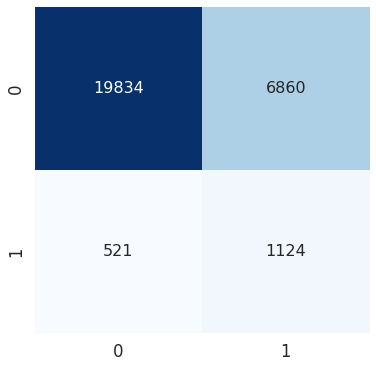

In [87]:
conf_matrix(y_test, predictions_NB)

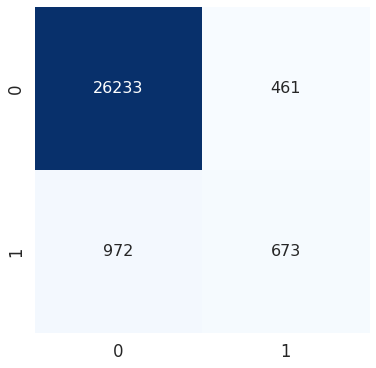

In [88]:
conf_matrix(y_test, predictions_RF)


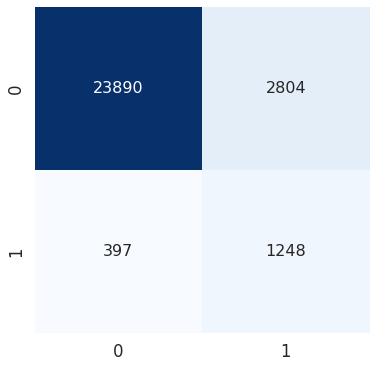

In [89]:
conf_matrix(y_test, predictions_RFW)


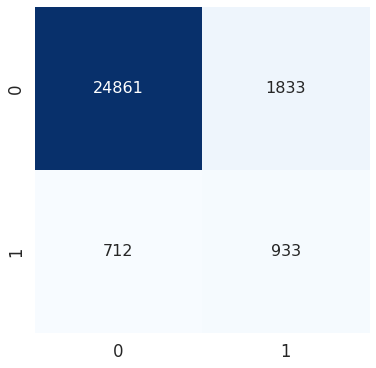

In [90]:
conf_matrix(y_test, predictions_DT)


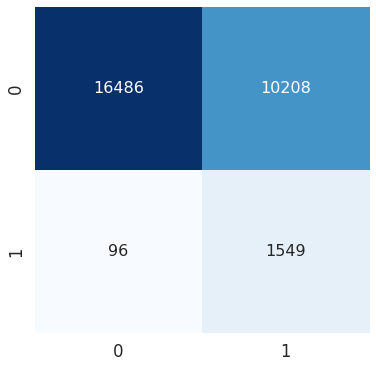

In [91]:
conf_matrix(y_test, predictions_DTW)
